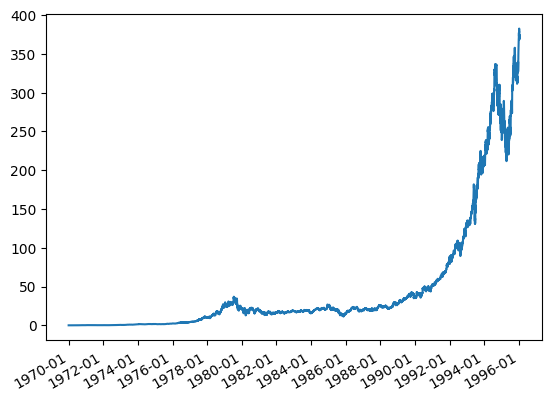

In [2]:
import pandas as pd

df = pd.read_csv('MSFT.csv')
df.index = df['Date']
df = df.drop('Date', axis=1)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
x = df.index
y = df['Close']

plt.plot(x, y)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gcf().autofmt_xdate()
plt.show()


In [17]:
data= pd.read_csv(r"D:\business-analytics-project-main\CPI_12-10-2023 17-06-38-99_timeSeries.csv")

C:\Users\FPTSHOP\AppData\Local\Temp\ipykernel_19604\3457355092.py:1: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,

In [19]:
data[data['Country Name'] == 'United States'][data['Indicator Code']== 'PCPI_PC_CP_A_PT'].to_csv('CPI.csv')

C:\Users\FPTSHOP\AppData\Local\Temp\ipykernel_19604\3182330291.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['Country Name'] == 'United States'][data['Indicator Code']== 'PCPI_PC_CP_A_PT'].to_csv('CPI.csv')


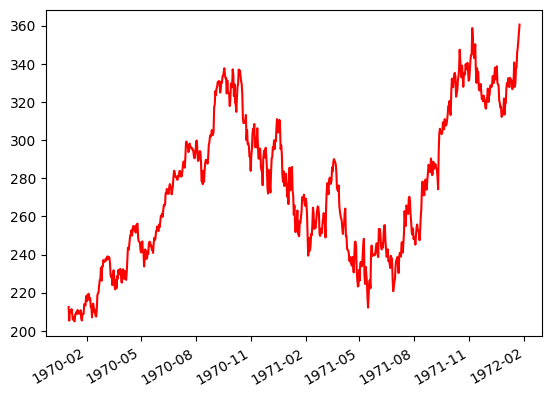

In [18]:
import pandas as pd

df_test = pd.read_csv('Microsoft_Data.csv')
df_test.index = df_test['Date']
df_test = df_test.drop('Date', axis=1)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

x = df_test.index
y = df_test['Close']

plt.plot(x, y, color = 'red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gcf().autofmt_xdate()
plt.show()


In [19]:
trend_daily_df = pd.DataFrame()
trend_daily_df['IncreaseRate'] = (df.Close.shift(-1) - df.Close)/df.Close*100
trend_daily_df['Trend'] = trend_daily_df['IncreaseRate']>0
# trend_daily_df['Trend']= trend_daily_df['Trend'].astype(int)
trend_daily_df['Trend'] = trend_daily_df['Trend'].map({True: 1, False: -1})
final_daily_data = pd.concat([df, trend_daily_df], axis=1)
final_daily_data.dropna(inplace=True)
final_daily_data

,Open,High,Low,Close,Adj Close,Volume,IncreaseRate,Trend
Date,,,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061378,1031788800,3.571208,1
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063570,308160000,1.725028,1
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064667,133171200,-2.543175,-1
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063022,67766400,-1.739026,-1
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061926,47894400,-2.654705,-1
...,...,...,...,...,...,...,...,...
2021-11-29,334.940002,339.029999,334.739990,336.630005,336.630005,28563500,-1.794257,-1
2021-11-30,335.320007,337.779999,328.989990,330.589996,330.589996,42885600,-0.154272,-1
2021-12-01,335.130005,339.279999,329.390015,330.079987,330.079987,33337600,-0.178744,-1


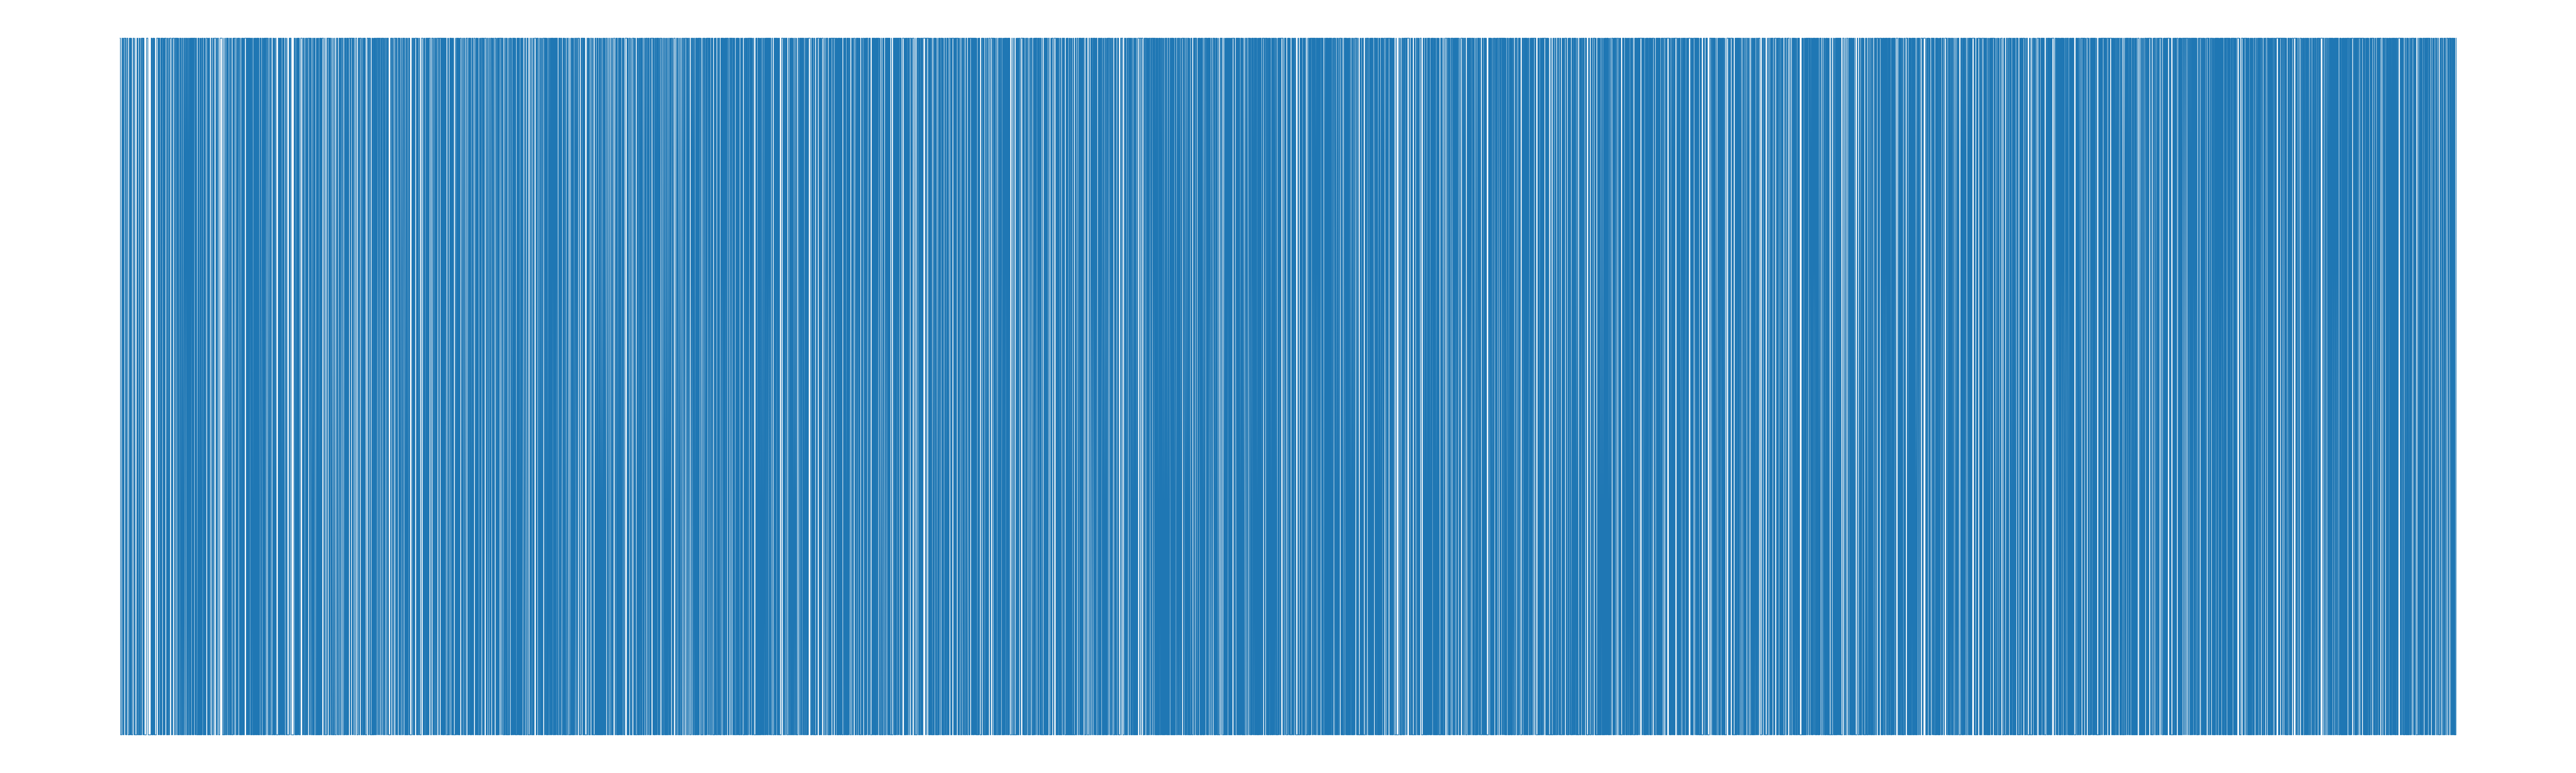

In [20]:
import matplotlib.pyplot as plt

x = final_daily_data.index
y = final_daily_data['Trend']

plt.figure(figsize=(100,30))
plt.plot(x, y)
plt.axis('off')
plt.show()

# Trend Monthly

In [21]:
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
trend_monthly_df = df.resample('m').mean()
trend_monthly_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-31,0.095703,0.098307,0.093895,0.096282,0.060784,1.547544e+08
1986-04-30,0.101819,0.104108,0.100418,0.102450,0.064679,2.487011e+07
1986-05-31,0.110863,0.112558,0.110078,0.111235,0.070225,1.587840e+07
1986-06-30,0.112083,0.113013,0.110078,0.111339,0.070291,1.398994e+07
1986-07-31,0.102884,0.104403,0.100892,0.102490,0.064704,2.094545e+07


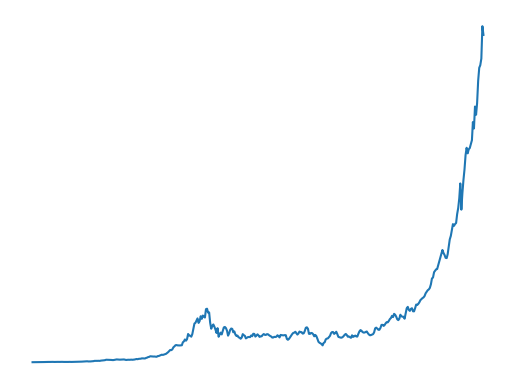

In [22]:
import matplotlib.pyplot as plt

x = trend_monthly_df.index
y = trend_monthly_df['Close']

plt.plot(x, y)
plt.axis('off')
plt.show()

In [23]:
trend_monthly_df = pd.DataFrame()
trend_monthly_df['IncreaseRate'] = (df.Close.shift(-1) - df.Close)/df.Close*100
trend_monthly_df['Trend'] = trend_monthly_df['IncreaseRate']>0
# trend_monthly_df['Trend']= trend_monthly_df['Trend'].astype(int)
trend_monthly_df['Trend'] = trend_monthly_df['Trend'].map({True: 1, False: -1})
final_monthy_data = pd.concat([df, trend_monthly_df], axis=1)
final_monthy_data.dropna(inplace=True)
final_monthy_data

,Open,High,Low,Close,Adj Close,Volume,IncreaseRate,Trend
Date,,,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061378,1031788800,3.571208,1
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063570,308160000,1.725028,1
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064667,133171200,-2.543175,-1
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063022,67766400,-1.739026,-1
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061926,47894400,-2.654705,-1
...,...,...,...,...,...,...,...,...
2021-11-29,334.940002,339.029999,334.739990,336.630005,336.630005,28563500,-1.794257,-1
2021-11-30,335.320007,337.779999,328.989990,330.589996,330.589996,42885600,-0.154272,-1
2021-12-01,335.130005,339.279999,329.390015,330.079987,330.079987,33337600,-0.178744,-1


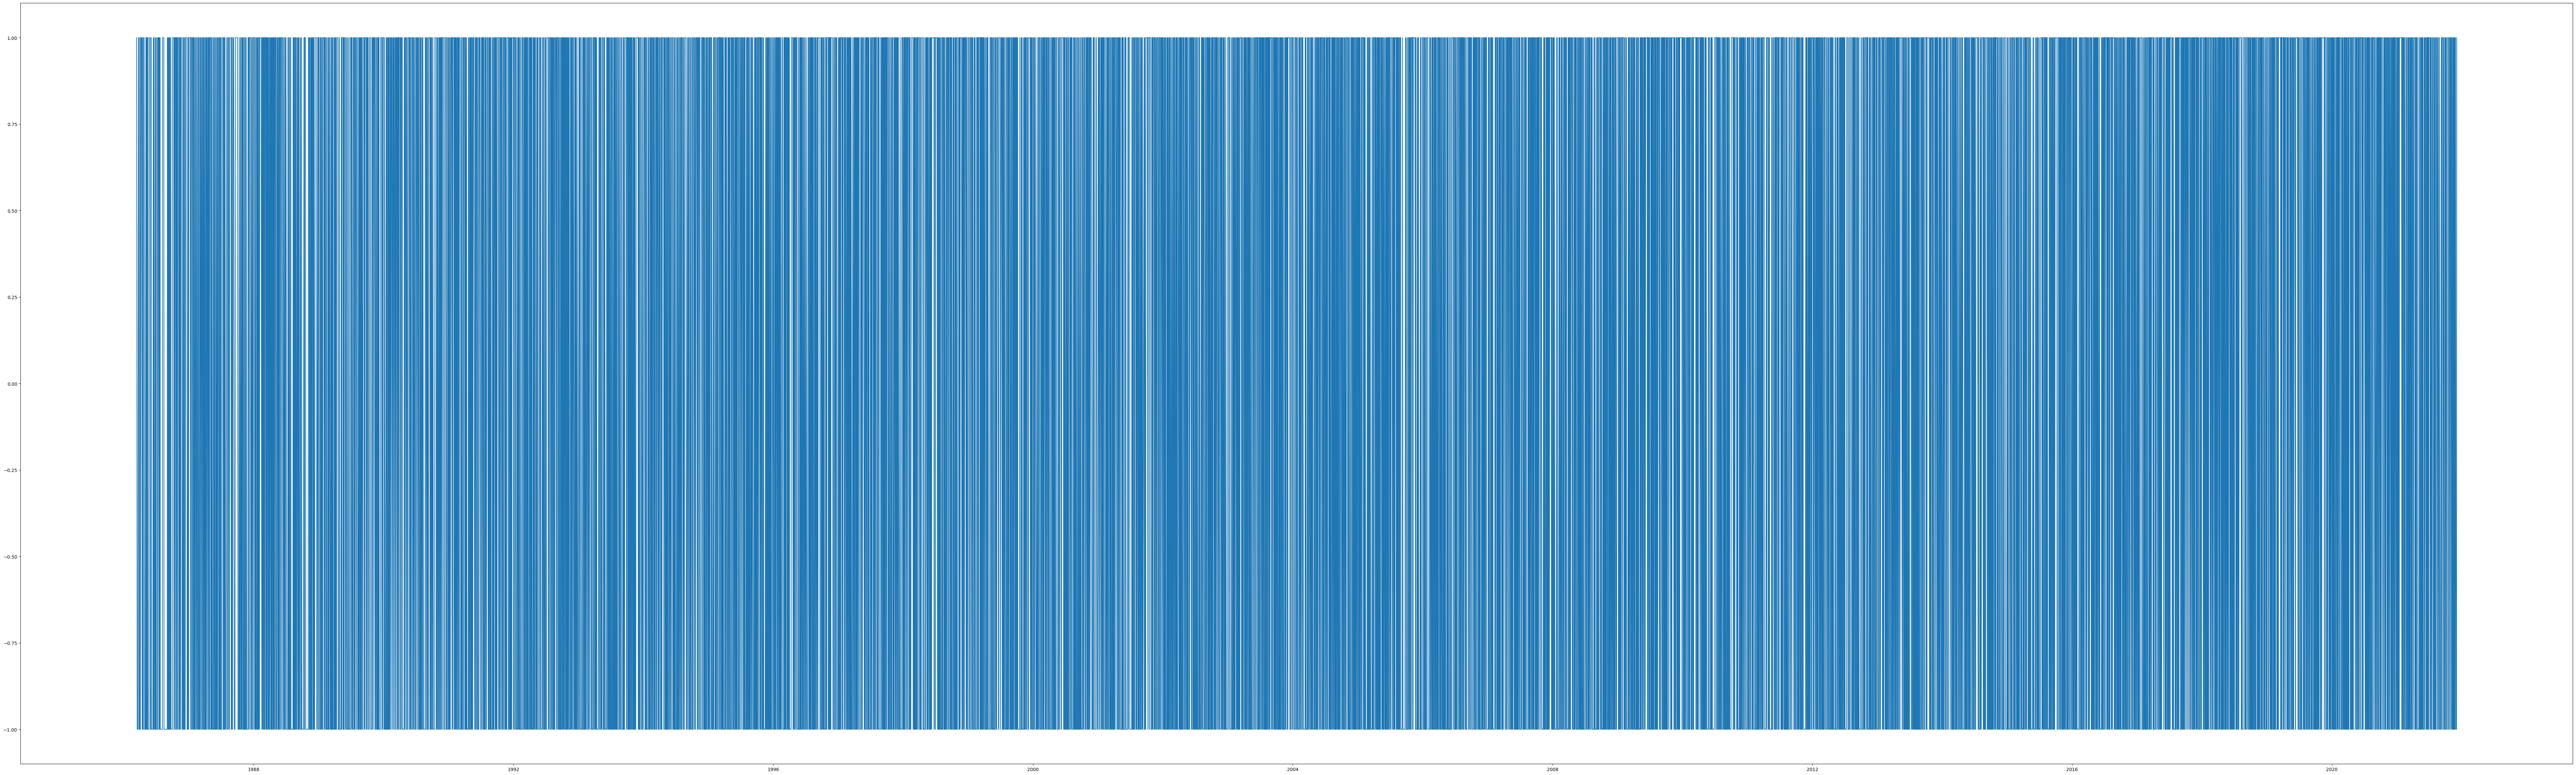

In [24]:
import matplotlib.pyplot as plt

x = final_monthy_data.index
y = final_monthy_data['Trend']

plt.figure(figsize=(100,30))
plt.plot(x, y)
# plt.axis('off')
plt.show()